# 95-865: Manifold Learning

Author: George H. Chen (georgechen [at symbol] cmu.edu)

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
%config InlineBackend.figure_format = 'retina'  # if you use a Mac with Retina display
np.set_printoptions(precision=2, suppress=True)

# these next three lines are needed on my old Intel Mac laptop due to some weird software update issue
import os
import psutil
os.environ['LOKY_MAX_CPU_COUNT'] = str(psutil.cpu_count(logical=False))

## Multi-dimensional scaling (MDS)

Given a table of pairwise distances, MDS finds points that approximately have those pairwise distances. MDS is used within the Isomap algorithm.

/Users/georgehc/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


1D coordinates:
[[ 6.4]
 [ 6.6]
 [ 0. ]
 [-4.6]
 [-8.4]]

1D distance table:
[[ 0.   0.2  6.4 11.  14.8]
 [ 0.2  0.   6.6 11.2 15. ]
 [ 6.4  6.6  0.   4.6  8.4]
 [11.  11.2  4.6  0.   3.8]
 [14.8 15.   8.4  3.8  0. ]]


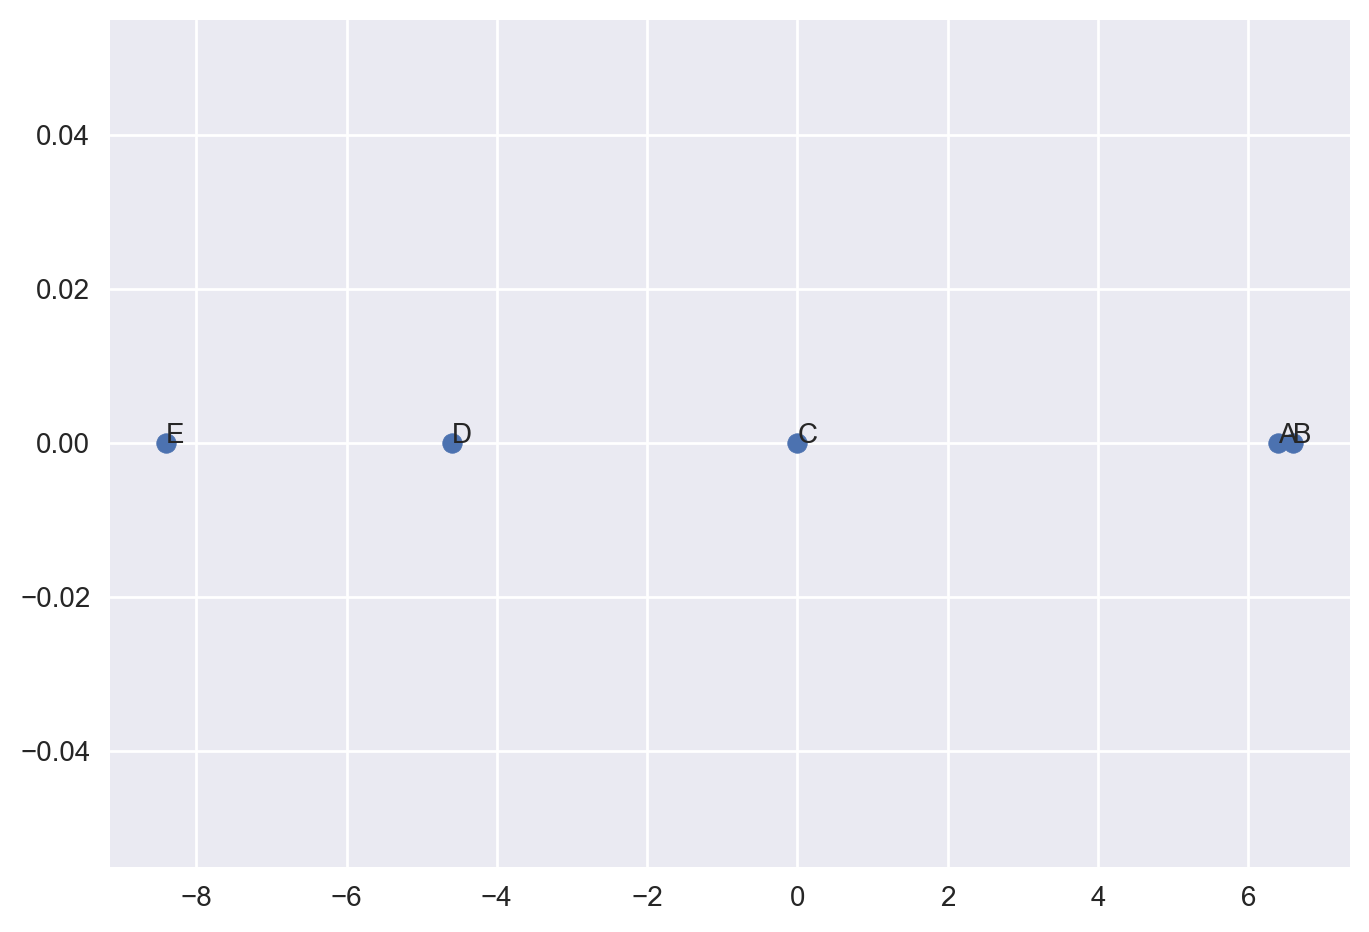

In [2]:
point_names = ['A', 'B', 'C', 'D', 'E']
distances = np.array([[0, 5, 8, 13, 16],
                      [5, 0, 5, 10, 13],
                      [8, 5, 0, 5, 8],
                      [13, 10, 5, 0, 5],
                      [16, 13, 8, 5, 0]])

from sklearn.manifold import MDS

# remove random_state=0 and re-running gives you different 1D representations of A, B, C, D, E
mds = MDS(n_components=1, dissimilarity='precomputed', random_state=0)
low_dimensional_points = mds.fit_transform(distances)
print('1D coordinates:')
print(low_dimensional_points)

# plotting code (same idea as how we did the 1D PCA plot in the earlier demo)
plt.scatter(low_dimensional_points,
            np.zeros(len(low_dimensional_points)))
for idx in range(len(point_names)):
    plt.annotate(point_names[idx], (low_dimensional_points[idx], 0))

# this shows you the low-dimensional distance table:
# - `pdist` computes pairwise distances between points, storing the results in a compact format
# - `squareform` converts the compact format into a 2D distance table like the ones from lecture
from scipy.spatial.distance import pdist, squareform
low_dimensional_distances = squareform(pdist(low_dimensional_points))
print()
print('1D distance table:')
print(low_dimensional_distances)

# Isomap

In practice, if you want to use Isomap, you don't need to write the MDS code yourself. Instead, you would use Isomap as follows (and Isomap's fitting procedure will do MDS under the hood without telling you about it):

In [3]:
# goes from outside to inside of the Swiss roll
swiss_roll_2d = np.array([[479, -231],
                          [515, -237],
                          [551, -233],
                          [581, -255],
                          [597, -284],
                          [610, -313],
                          [619, -341],
                          [623, -368],
                          [617, -407],
                          [591, -434],
                          [573, -468],
                          [542, -478],
                          [507, -490],
                          [471, -482],
                          [437, -462],
                          [398, -446],
                          [383, -408],
                          [403, -373],
                          [430, -349],
                          [470, -326],
                          [507, -320],
                          [531, -352],
                          [527, -385],
                          [487, -397]])

In [4]:
print(swiss_roll_2d.shape)

(24, 2)


(371.0, 635.0, -502.95, -218.05)

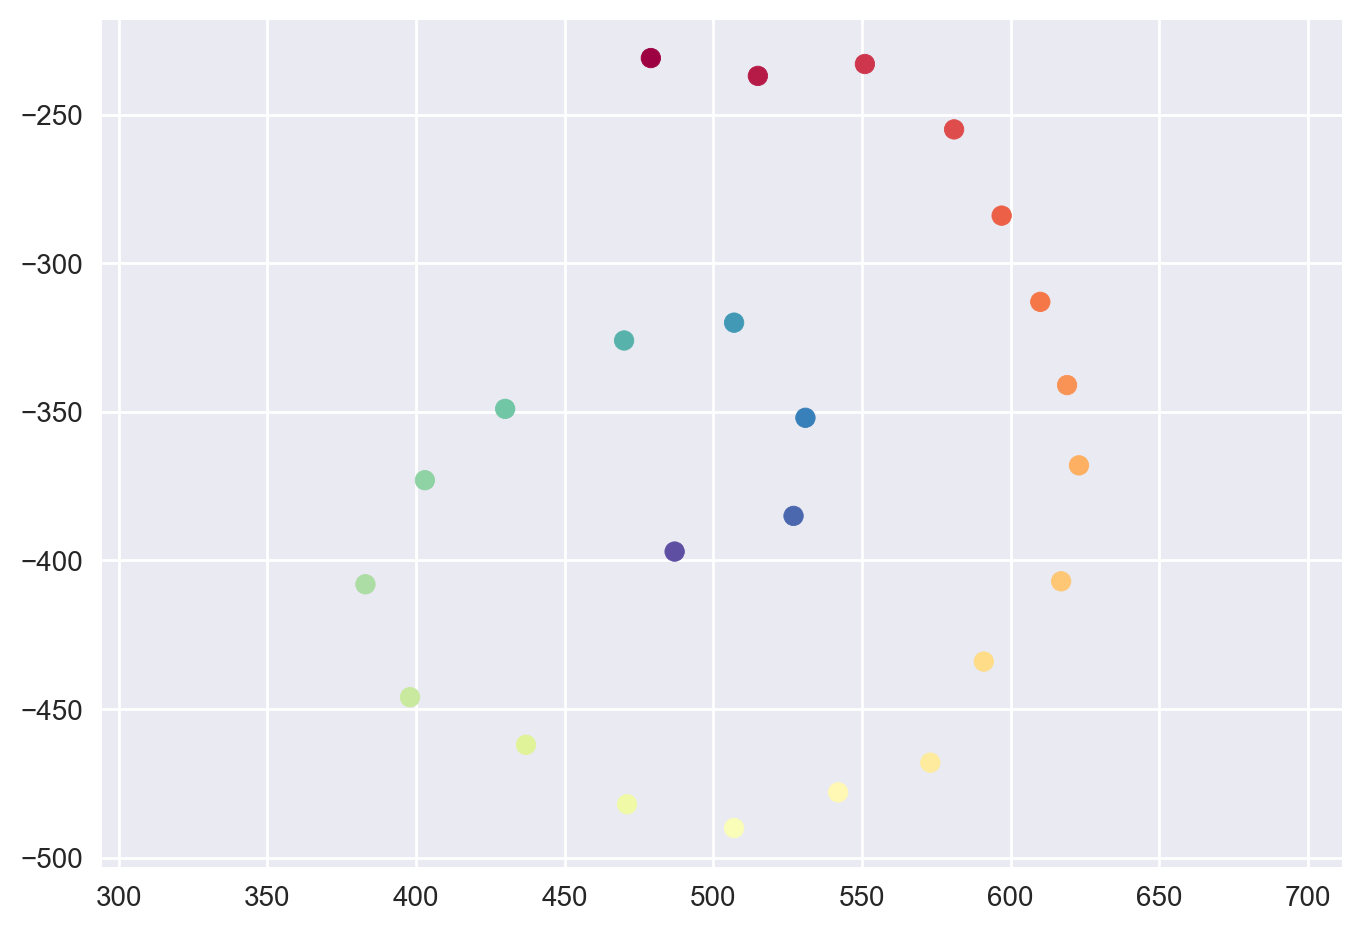

In [5]:
plt.scatter(swiss_roll_2d[:, 0], swiss_roll_2d[:, 1], c=list(range(len(swiss_roll_2d))), cmap='Spectral')
plt.axis('equal')

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
swiss_roll_1d_pca = pca.fit_transform(swiss_roll_2d)

In [7]:
def plot_1d(data_1d, y_offset=-0.001):
    plt.scatter(data_1d, np.zeros(len(data_1d)),
                c=list(range(len(data_1d))), cmap='Spectral')

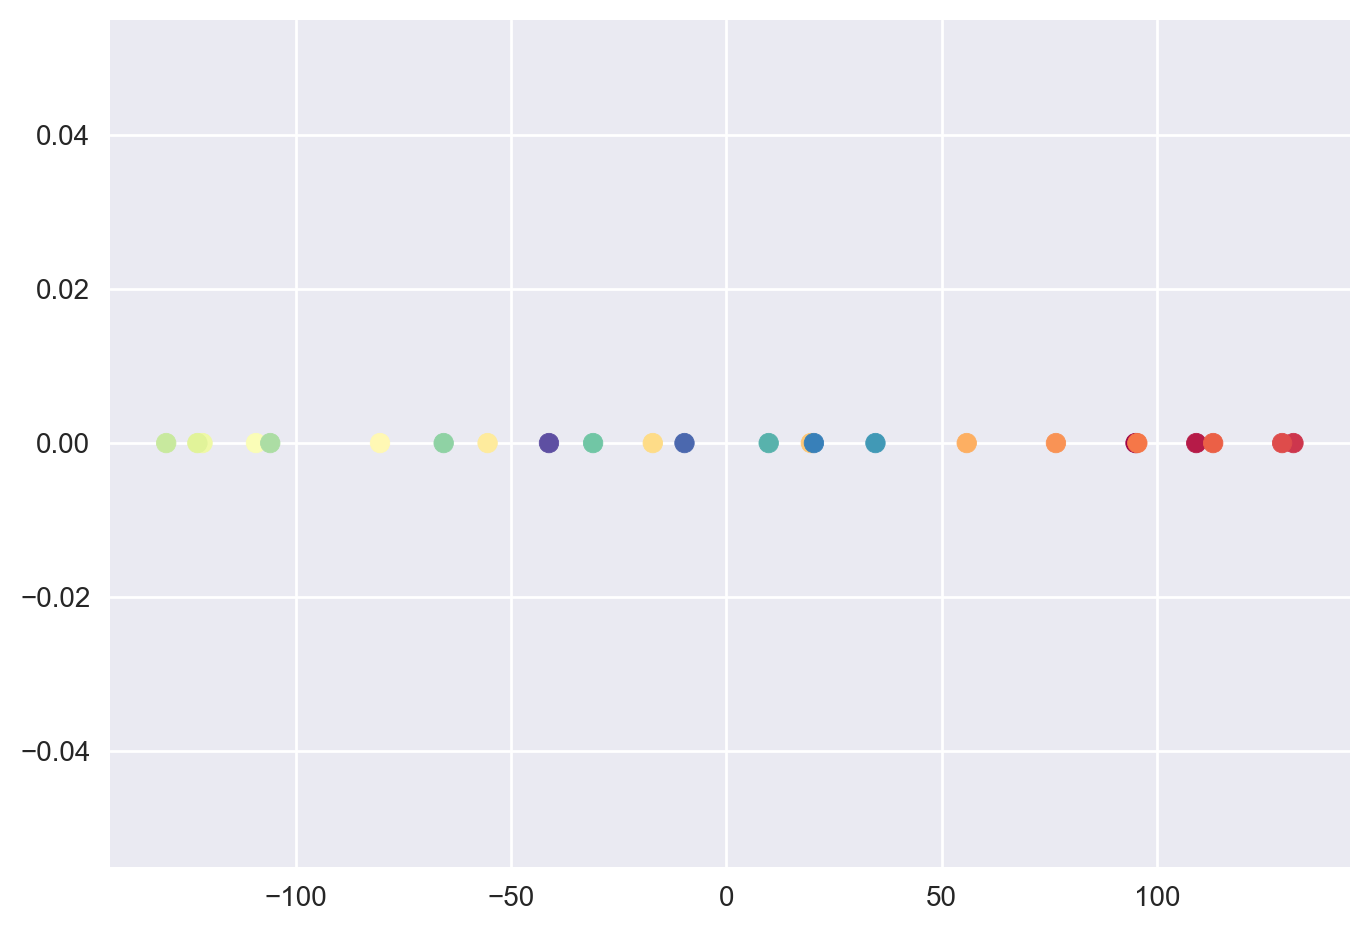

In [8]:
plot_1d(swiss_roll_1d_pca)

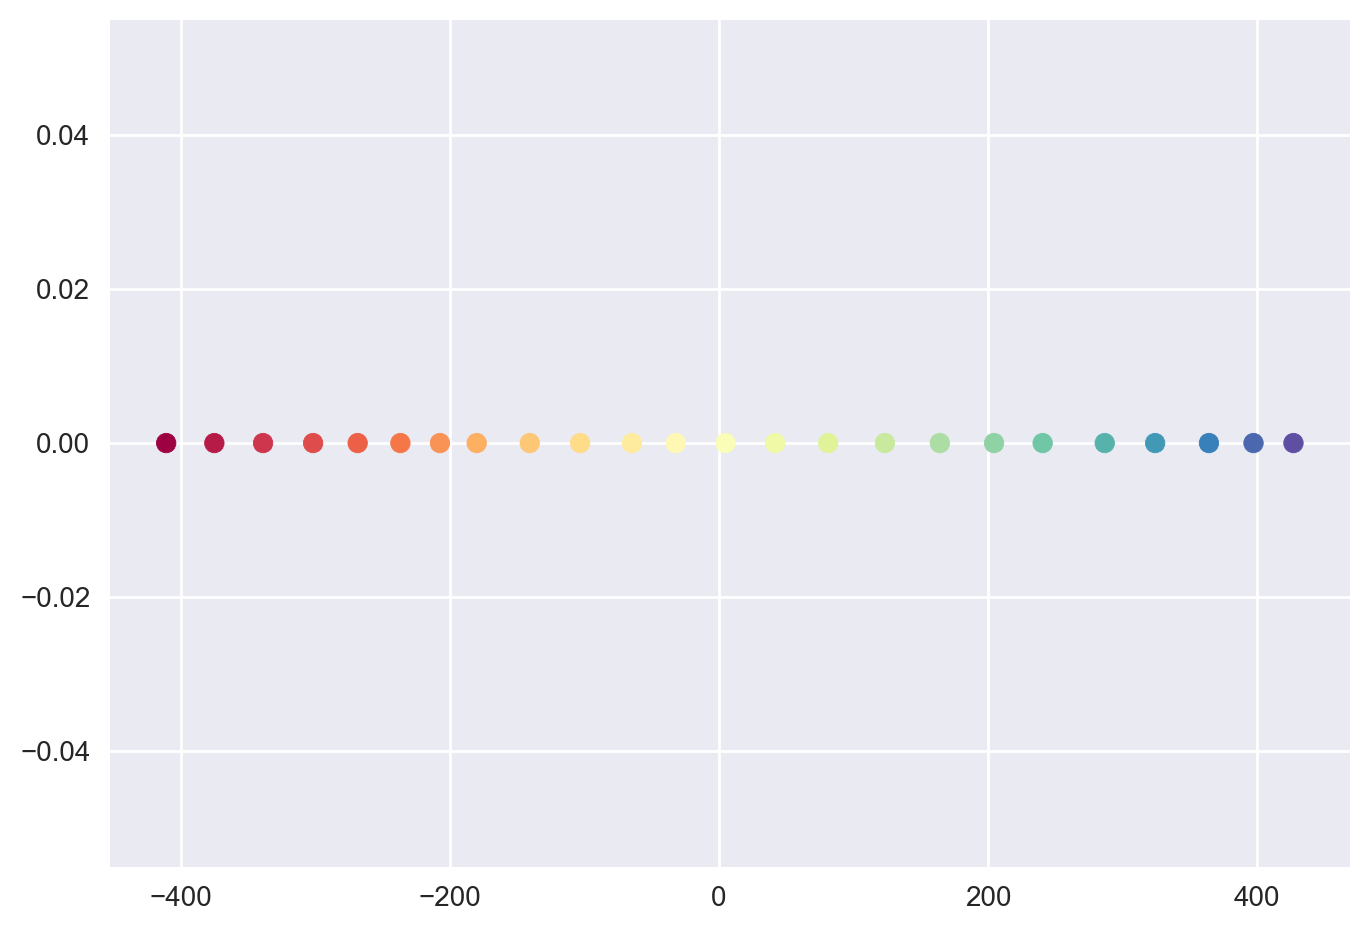

In [9]:
from sklearn.manifold import Isomap

isomap = Isomap(n_neighbors=2, n_components=1)
swiss_roll_1d_isomap = isomap.fit_transform(swiss_roll_2d)
plot_1d(swiss_roll_1d_isomap)

In case you are wondering what distance matrix Isomap computed (using the nearest neighbor graph) to use with Isomap, you can print it out as follows:

In [10]:
print(isomap.dist_matrix_)

[[  0.    36.5   72.03 109.23 142.35 174.13 203.54 230.84 270.3  307.78
  346.25 378.82 415.82 452.7  492.15 534.3  575.16 615.47 651.59 697.73
  735.22 775.22 808.46 838.15]
 [ 36.5    0.    36.22  73.42 106.54 138.33 167.74 195.03 234.49 271.97
  310.44 343.02 380.02 416.89 456.34 498.5  539.35 579.66 615.78 661.93
  699.41 739.41 772.65 802.35]
 [ 72.03  36.22   0.    37.2   70.32 102.1  131.51 158.81 198.27 235.75
  274.22 306.8  343.8  380.67 420.12 462.27 503.13 543.44 579.56 625.7
  663.19 703.19 736.43 766.12]
 [109.23  73.42  37.2    0.    33.12  64.9   94.31 121.61 161.07 198.55
  237.02 269.59 306.59 343.47 382.92 425.07 465.93 506.24 542.36 588.5
  625.99 665.99 699.23 728.92]
 [142.35 106.54  70.32  33.12   0.    31.78  61.19  88.49 127.94 165.43
  203.9  236.47 273.47 310.35 349.8  391.95 432.8  473.12 509.24 555.38
  592.86 632.86 666.11 695.8 ]
 [174.13 138.33 102.1   64.9   31.78   0.    29.41  56.71  96.16 133.65
  172.12 204.69 241.69 278.57 318.02 360.17 401.02 441.

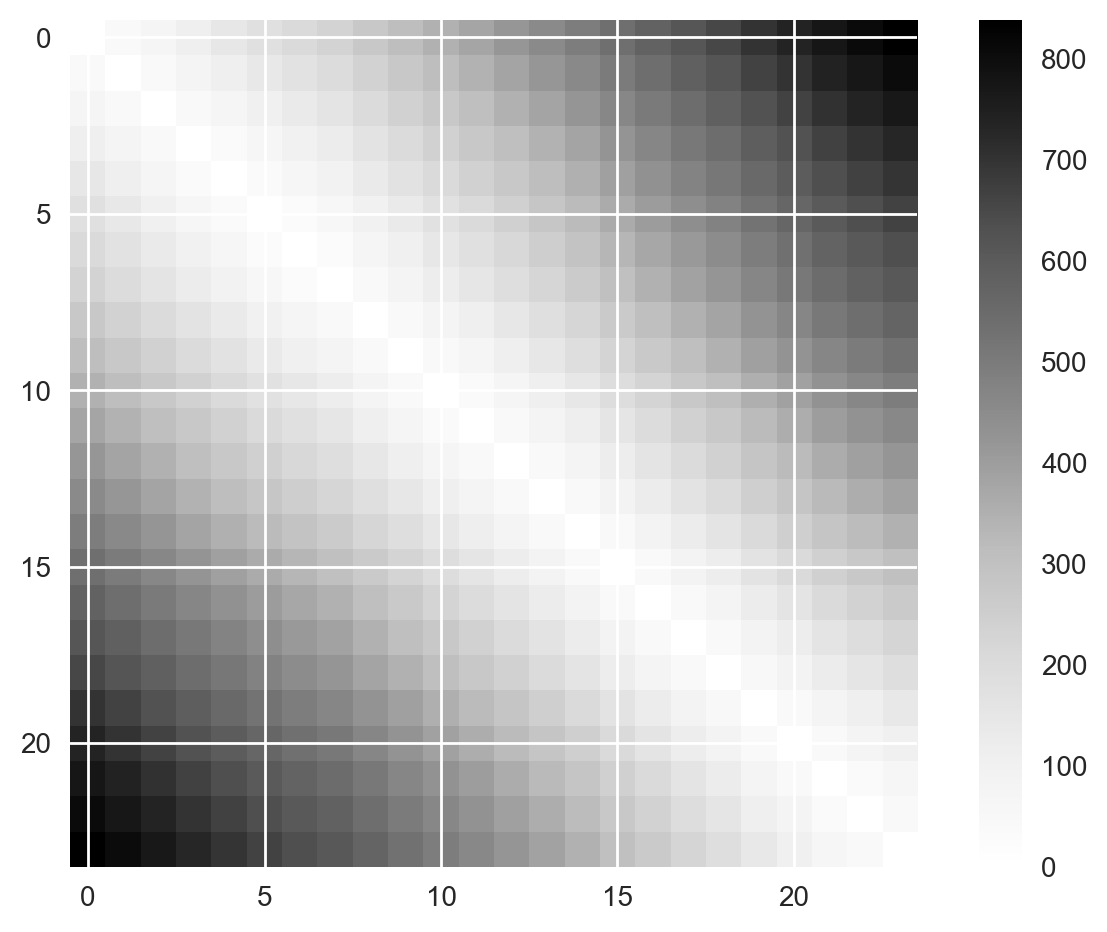

In [11]:
plt.imshow(isomap.dist_matrix_)
plt.colorbar()

What happens if you choose the number of nearest neighbors to be too large?

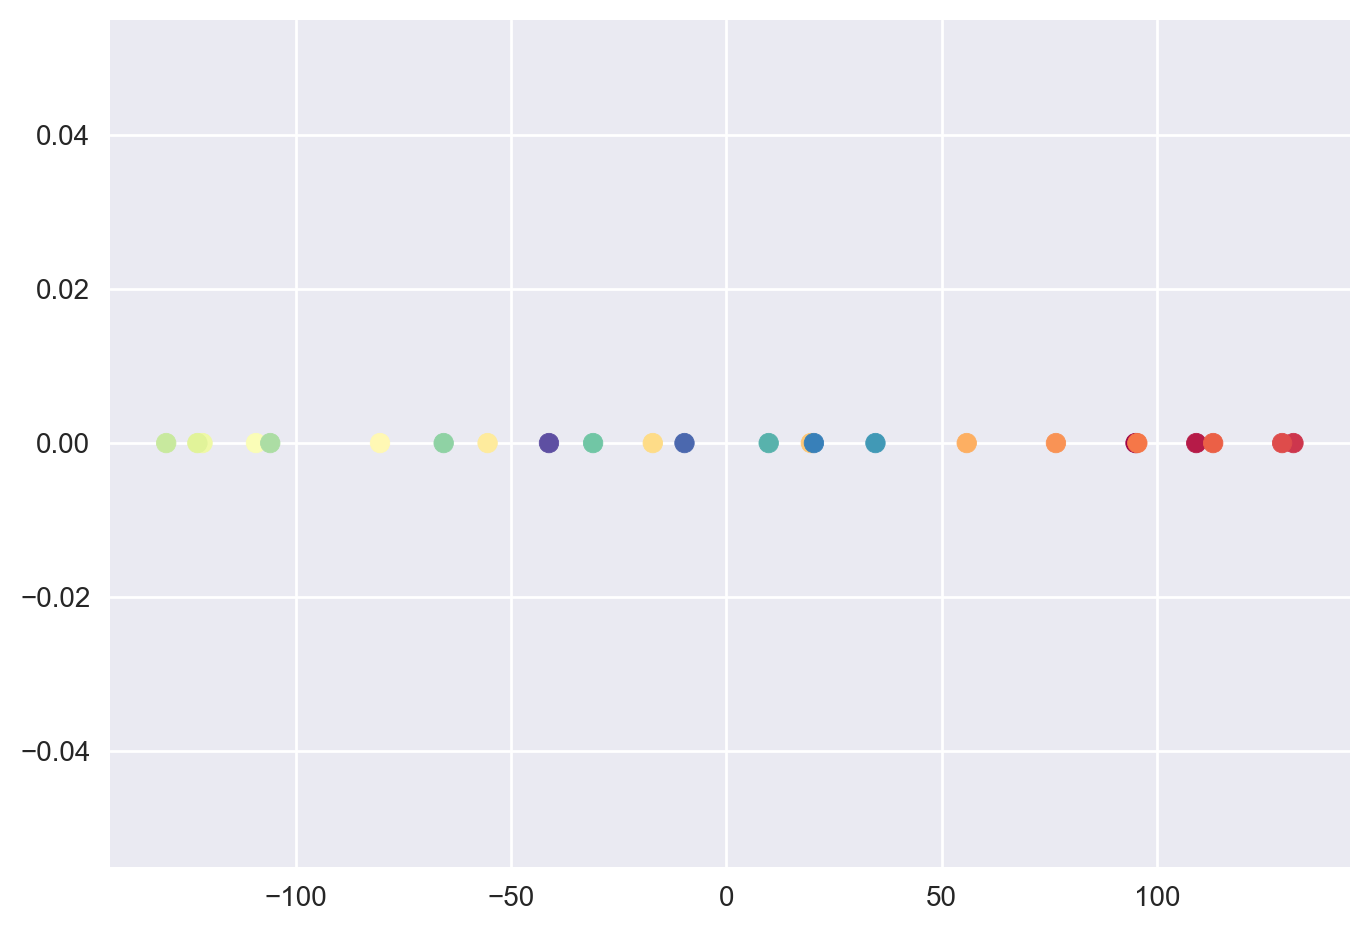

In [12]:
bad_isomap = Isomap(n_neighbors=23, n_components=1)
swiss_roll_1d_bad_isomap = bad_isomap.fit_transform(swiss_roll_2d)

plot_1d(swiss_roll_1d_bad_isomap)

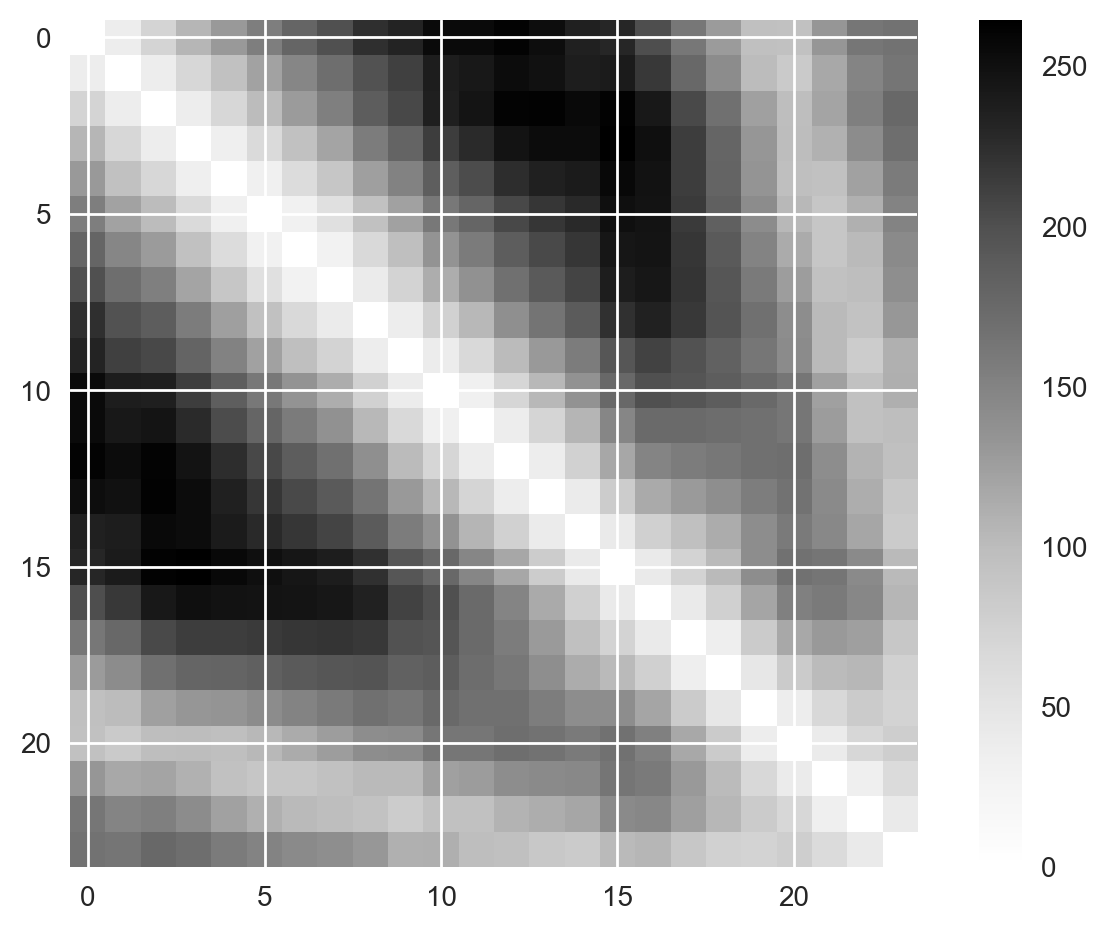

In [13]:
plt.imshow(bad_isomap.dist_matrix_)
plt.colorbar()

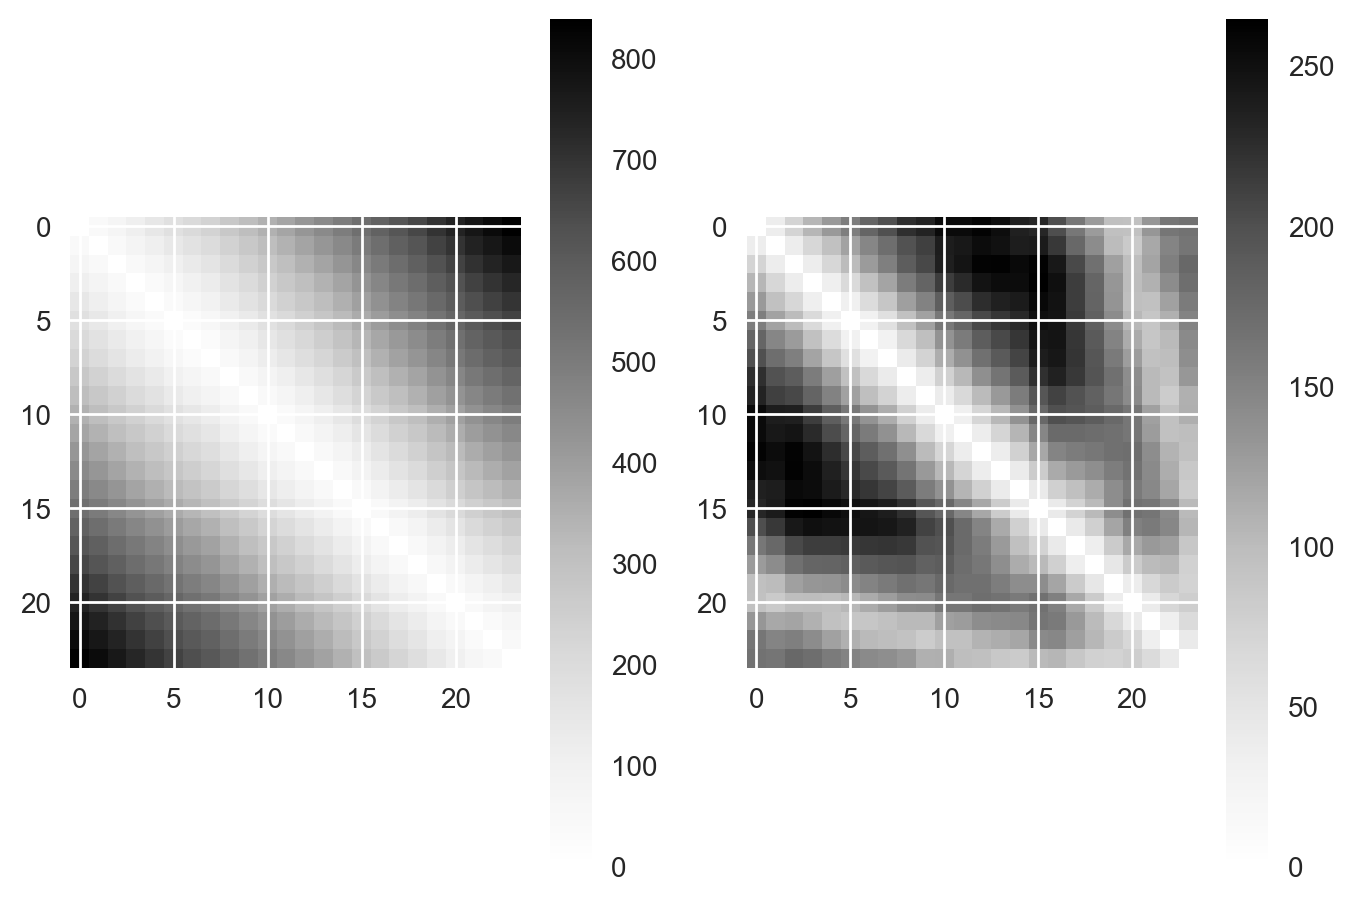

In [14]:
plt.subplot(1, 2, 1)
plt.imshow(isomap.dist_matrix_)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(bad_isomap.dist_matrix_)
plt.colorbar()

# t-SNE

In terms of using other manifold learning algorithms that scikit-learn provides, the code is similar to using PCA and Isomap; however, different methods have different parameters that you do have to play with. One of the most popular manifold learning methods used in practice is t-SNE. Here's an example usage case:

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 24 samples in 0.001s...
[t-SNE] Computed neighbors for 24 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 24 / 24
[t-SNE] Mean sigma: 23.784069
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.421410
[t-SNE] KL divergence after 1000 iterations: 0.371065


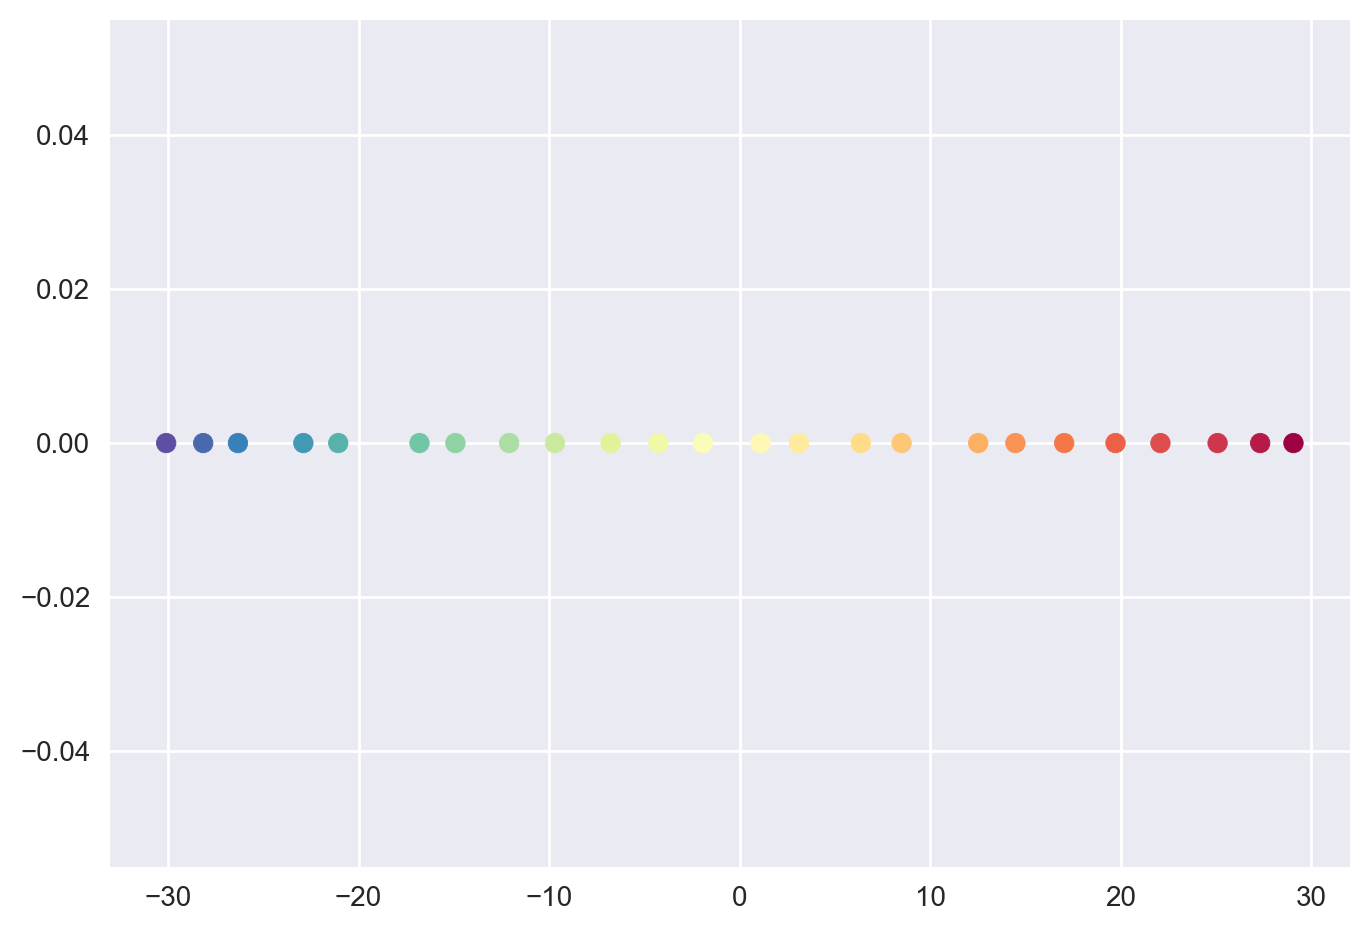

In [15]:
from sklearn.manifold import TSNE

# *WARNING*: *despite* what the sklearn documentation says for t-SNE, the perplexity parameter
# does matter! a helpful article to read: https://distill.pub/2016/misread-tsne/
tsne = TSNE(n_components=1, perplexity=2, learning_rate=0.1, n_iter=1000, init='random', verbose=1, random_state=0)
swiss_roll_1d_tsne = tsne.fit_transform(swiss_roll_2d)
plot_1d(swiss_roll_1d_tsne)